In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math

Import data, name columns.

In [2]:
data = pd.read_csv("machine.data.txt", header=None, names = ['vendor_name','model name',
        'MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','performance','est_performance'])
print(data.head())
print(data.corr())

  vendor_name model name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  performance  \
0     adviser      32/60   125   256   6000   256     16    128          198   
1      amdahl     470v/7    29  8000  32000    32      8     32          269   
2      amdahl    470v/7a    29  8000  32000    32      8     32          220   
3      amdahl    470v/7b    29  8000  32000    32      8     32          172   
4      amdahl    470v/7c    29  8000  16000    32      8     16          132   

   est_performance  
0              199  
1              253  
2              253  
3              253  
4              132  
                     MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX  \
MYCT             1.000000 -0.335642 -0.378561 -0.321000 -0.301090 -0.250502   
MMIN            -0.335642  1.000000  0.758157  0.534729  0.517189  0.266907   
MMAX            -0.378561  0.758157  1.000000  0.537990  0.560513  0.527246   
CACH            -0.321000  0.534729  0.537990  1.000000  0.582245  0.487846  

***see if you can cut out highly correlated ones (after you finish running it complete)

# KNN Regression

Convert numerical features to numeric.<br>
Iterate through each input feature to see a visual representation of its relationship with the outcome.<br>
Create KNN object and fit with training data.<br>
Create "test" data and graph.

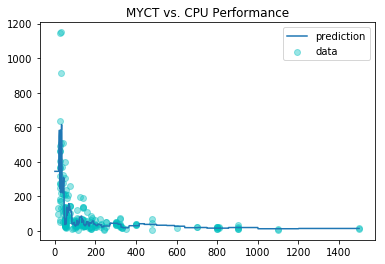

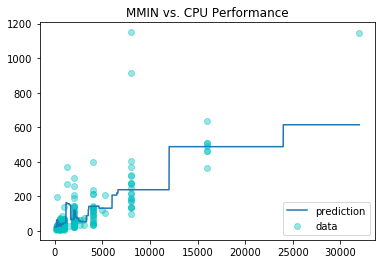

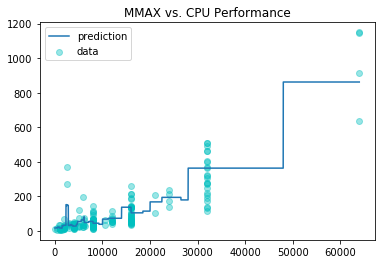

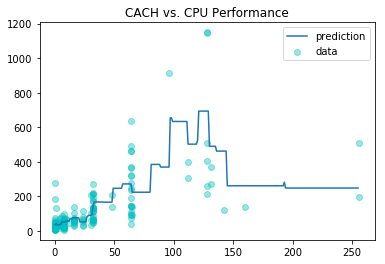

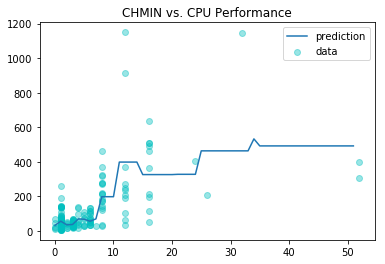

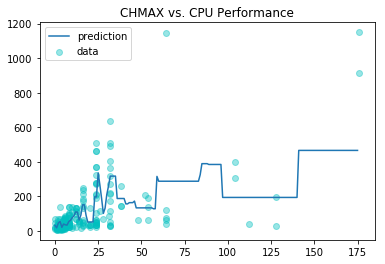

In [3]:
features = ['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','performance','est_performance']
input_features = ['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']

data[features] = data[features].apply(pd.to_numeric)

from sklearn import neighbors

neighbor_nums = [2,6,10,20]

def KNN_regression(dataset, features, n):

    knn = neighbors.KNeighborsRegressor(n_neighbors = n)
    knn_w = neighbors.KNeighborsRegressor(n_neighbors = n, weights='distance')

    for feature in input_features:
        X = dataset[[feature]]
        Y = dataset[['performance']]
        knn.fit(X,Y)

        high = max(data[feature])

        T = np.arange(0,high,1)[:,np.newaxis]
        Y_ = knn.predict(T)

        plt.scatter(X, Y, label="data", alpha = 0.4, c="c")
        plt.plot(T, Y_, label = "prediction")
        plt.title(f'{feature} vs. CPU Performance')
        plt.legend()
        plt.show()
        
KNN_regression(data, input_features, 5)

The distribution of MYCT is the most drastic. This gives me an intuitive sense that this is the strongest indicator for CPU performance. Using MYCT to predict performance produces a KNN regression line with the least error. However, there is still significant error on the left hand side of the line. Therefore, this feature alone would not be enough to predict the output.<br>

All other variables have a similar relationship with the outcome. They generally rise in stepwise increments, even if they hit a few local maximums along the way. If one of these were to be removed, we would still have 3 other features with similar relationships to outcome. All regression lines for these features are high in error. <br>

However, this is not the full picture and we want to see the relationship of ALL variables with the outcome. This cannot be visualized, only evaluated through cross val score.

In [9]:
from sklearn.model_selection import cross_val_score

def KNN_reg_plus (dataset, features, n):
    knn = neighbors.KNeighborsRegressor(n_neighbors = n)
    knn_w = neighbors.KNeighborsRegressor(n_neighbors = n, weights='distance')

    X = dataset[features]
    Y = dataset[['performance']]
    knn.fit(X,Y)
    knn_w.fit(X,Y)

    fold_nums = [2,3,4,5,6,7,8,9,10]

    for fold_num in fold_nums:
        score = cross_val_score(knn, X, Y, cv=fold_num)
        print(f"\nNeighbors: {n}")
        print(f"Folds: {fold_num}")
        print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

        score_w = cross_val_score(knn_w, X, Y, cv=fold_num)
        print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
        
neighbor_nums = [2,4,6,8,10]
for n in neighbor_nums:
    KNN_reg_plus(data, input_features, n)


Neighbors: 2
Folds: 2
Unweighted Accuracy: 0.84 (+/- 0.15)
Weighted Accuracy: 0.82 (+/- 0.11)

Neighbors: 2
Folds: 3
Unweighted Accuracy: 0.84 (+/- 0.15)
Weighted Accuracy: 0.84 (+/- 0.16)

Neighbors: 2
Folds: 4
Unweighted Accuracy: 0.85 (+/- 0.15)
Weighted Accuracy: 0.85 (+/- 0.13)

Neighbors: 2
Folds: 5
Unweighted Accuracy: 0.68 (+/- 0.79)
Weighted Accuracy: 0.71 (+/- 0.62)

Neighbors: 2
Folds: 6
Unweighted Accuracy: 0.74 (+/- 0.41)
Weighted Accuracy: 0.72 (+/- 0.47)

Neighbors: 2
Folds: 7
Unweighted Accuracy: 0.60 (+/- 0.82)
Weighted Accuracy: 0.62 (+/- 0.73)

Neighbors: 2
Folds: 8
Unweighted Accuracy: 0.59 (+/- 0.76)
Weighted Accuracy: 0.59 (+/- 0.74)

Neighbors: 2
Folds: 9
Unweighted Accuracy: 0.54 (+/- 0.83)
Weighted Accuracy: 0.58 (+/- 0.81)

Neighbors: 2
Folds: 10
Unweighted Accuracy: 0.43 (+/- 1.01)
Weighted Accuracy: 0.44 (+/- 0.98)

Neighbors: 4
Folds: 2
Unweighted Accuracy: 0.79 (+/- 0.01)
Weighted Accuracy: 0.79 (+/- 0.04)

Neighbors: 4
Folds: 3
Unweighted Accuracy: 0.79 

The best cross val score comes when we make 4 folds in the model with k = 2 neighbors. This gives an unweighted and a weighted R-squared score of 0.85. The weighted model has a variance of +/- 0.13, which means that the R-squared value for the various folds remained more consistent when the K-nearest neighbor points were weighted by distance. I would choose this model going forth for its high R-squared value and low R-squared variance across folds.


# OLS Regression

CPU Performance

Coefficients: 
 [ 0.0488549   0.01529257  0.00557139  0.64140143 -0.27035755  1.48247217]

Intercept: 
 -55.893933607

R-squared:
0.864890692277


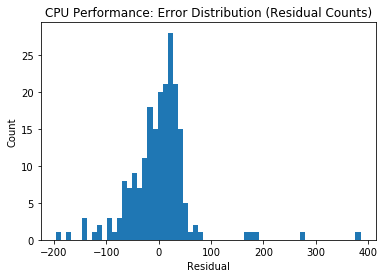

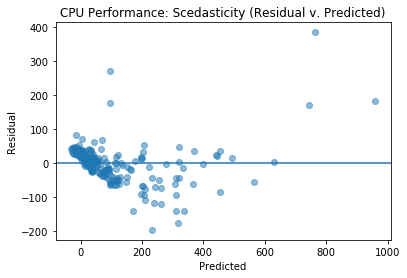

CPU Performance: Correlation Matrix
           MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX
MYCT   1.000000 -0.335642 -0.378561 -0.321000 -0.301090 -0.250502
MMIN  -0.335642  1.000000  0.758157  0.534729  0.517189  0.266907
MMAX  -0.378561  0.758157  1.000000  0.537990  0.560513  0.527246
CACH  -0.321000  0.534729  0.537990  1.000000  0.582245  0.487846
CHMIN -0.301090  0.517189  0.560513  0.582245  1.000000  0.548281
CHMAX -0.250502  0.266907  0.527246  0.487846  0.548281  1.000000


CPU Performance: Cross Validation
[ 0.74467102  0.61585856]
Number of Folds: 2
Cross-Validation Accuracy: 0.68026478888


CPU Performance: Cross Validation
[ 0.8360828   0.46901857  0.63740571]
Number of Folds: 3
Cross-Validation Accuracy: 0.647502357677


CPU Performance: Cross Validation
[ 0.83772852  0.69537654  0.89024147  0.61483668]
Number of Folds: 4
Cross-Validation Accuracy: 0.759545802942


CPU Performance: Cross Validation
[ 0.83594822 -0.09964463  0.86840964  0.84135651  0.63509917]


In [17]:
from sklearn import linear_model

def lin_reg(dataset, features, name, exclude_features = None):
    if exclude_features != None:
        features = [f for f in features if f not in exclude_features]
    Y = dataset['performance']
    X = dataset[features]
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    print(f'{name}')
    print('\nCoefficients: \n', regr.coef_)
    print('\nIntercept: \n', regr.intercept_)
    print('\nR-squared:')
    print(regr.score(X, Y))

    predicted = regr.predict(X).ravel()
    actual = dataset['performance']

    residual = actual - predicted
    plt.hist(residual, bins=60)
    plt.title(f'{name}: Error Distribution (Residual Counts)')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()
    
    plt.scatter(predicted, residual, alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title(f'{name}: Scedasticity (Residual v. Predicted)')
    plt.show()

    print(f'{name}: Correlation Matrix')
    corr_mat = X.corr()
    print(corr_mat)
    print('\n')
    
    fold_nums = [2,3,4,5,6,7,8,9,10]
    
    for fold_num in fold_nums:
        print(f'{name}: Cross Validation')
        cross_val_acc = cross_val_score(regr, X.as_matrix(), Y, cv = fold_num, scoring="r2")
        print(cross_val_acc)
        print(f'Number of Folds: {fold_num}')
        print("Cross-Validation Accuracy:", sum(list(cross_val_acc))/len(cross_val_acc))
        print("\n")

lin_reg(data, input_features, 'CPU Performance')

CPU Performance

Coefficients: 
 [ 0.04178016  0.00915418  0.92707591  1.12214583  0.80365776]

Intercept: 
 -54.1991608838

R-squared:
0.818019366285


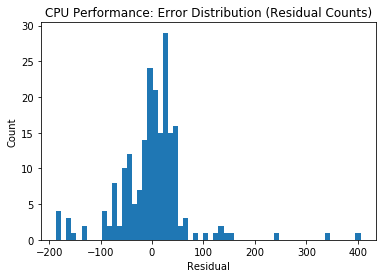

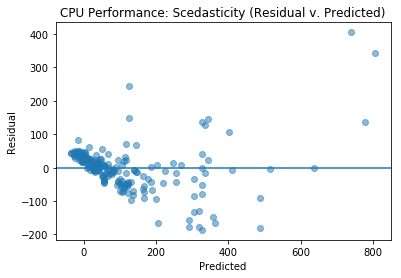

CPU Performance: Correlation Matrix
           MYCT      MMAX      CACH     CHMIN     CHMAX
MYCT   1.000000 -0.378561 -0.321000 -0.301090 -0.250502
MMAX  -0.378561  1.000000  0.537990  0.560513  0.527246
CACH  -0.321000  0.537990  1.000000  0.582245  0.487846
CHMIN -0.301090  0.560513  0.582245  1.000000  0.548281
CHMAX -0.250502  0.527246  0.487846  0.548281  1.000000


CPU Performance: Cross Validation
[ 0.6291723   0.49499851]
Number of Folds: 2
Cross-Validation Accuracy: 0.562085402436


CPU Performance: Cross Validation
[ 0.76245304  0.40098224  0.47640318]
Number of Folds: 3
Cross-Validation Accuracy: 0.546612822274


CPU Performance: Cross Validation
[ 0.75178389  0.51452721  0.8482451   0.39487625]
Number of Folds: 4
Cross-Validation Accuracy: 0.627358114966


CPU Performance: Cross Validation
[ 0.74150012  0.04471221  0.67018084  0.83589211  0.47937614]
Number of Folds: 5
Cross-Validation Accuracy: 0.554332285112


CPU Performance: Cross Validation
[ 0.73118147  0.56510985  0.

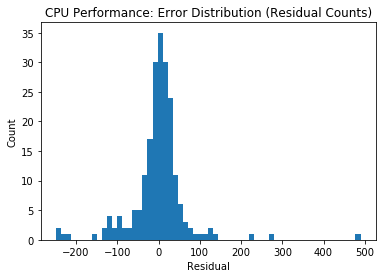

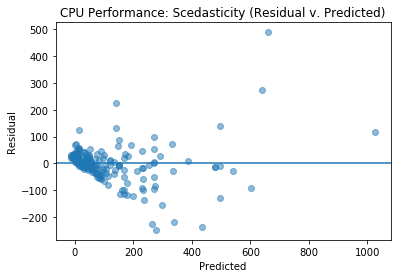

CPU Performance: Correlation Matrix
           MYCT      MMIN      CACH     CHMIN     CHMAX
MYCT   1.000000 -0.335642 -0.321000 -0.301090 -0.250502
MMIN  -0.335642  1.000000  0.534729  0.517189  0.266907
CACH  -0.321000  0.534729  1.000000  0.582245  0.487846
CHMIN -0.301090  0.517189  0.582245  1.000000  0.548281
CHMAX -0.250502  0.266907  0.487846  0.548281  1.000000


CPU Performance: Cross Validation
[ 0.62999846  0.49960651]
Number of Folds: 2
Cross-Validation Accuracy: 0.564802484584


CPU Performance: Cross Validation
[ 0.77902529  0.13667107  0.52622172]
Number of Folds: 3
Cross-Validation Accuracy: 0.480639362047


CPU Performance: Cross Validation
[ 0.77300702  0.6525017   0.79325784  0.48978568]
Number of Folds: 4
Cross-Validation Accuracy: 0.677138057761


CPU Performance: Cross Validation
[ 0.77483916 -0.77275515  0.89625997  0.72410944  0.49971333]
Number of Folds: 5
Cross-Validation Accuracy: 0.424433351519


CPU Performance: Cross Validation
[ 0.76628738  0.489314    0.

In [18]:
lin_reg(data, input_features, 'CPU Performance', exclude_features = ['MMIN'])
lin_reg(data, input_features, 'CPU Performance', exclude_features = ['MMAX'])




Again, we see the highest accuracy in the model with 4 folds. The accuracy is 0.76 for this OLS Regression model, which is 0.02 lower than the accuracy of 0.78 that we found using weighted KNN Regression.<br>update this

In both models, the cross val score starts dropping after 4 folds because there isn't enough training data for the model to accurately train on.<br>wrong change

Overall, I think that KNN Regression works better for data that has outliers. It allows those outliers to have more or less influence on the prediction depending on its proximity to the prediction point, whereas in OLS all the data gets lumped together in one formula. This is supported by the presence of outliers in the scedasticity plot. It is possible that KNN Regression is better at picking up nuances in the data, but this may also make it prone to overfitting.

If your data cannot be linearly separated, then KNN regression is a better choice. 

KNN is a more complex model which can capture complicated relationships. However, this can result in a lot of noise in the prediction. For very noisy data, it may be better to use linear regression because it is a much simpler model. 

There doesn't appear to be a strong linear relationship. We would potentially be able to transform the features to obtain a more linear relationship.

Do both!